<a href="https://colab.research.google.com/github/YSayaovong/A-B_Testing/blob/main/A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install any missing libraries (if necessary)
!pip install -q scipy

# Import libraries
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency
import matplotlib.pyplot as plt


In [2]:
# Simulated data
np.random.seed(42)

# Simulate Group A (Blue Button, 45% click rate)
group_a = np.random.binomial(1, 0.45, 1000)

# Simulate Group B (Green Button, 50% click rate)
group_b = np.random.binomial(1, 0.50, 1000)

# Create a DataFrame
data = pd.DataFrame({
    'Group': ['A'] * 1000 + ['B'] * 1000,
    'Click': np.concatenate([group_a, group_b])
})

data.head()


,Group,Click
0,A,0
1,A,1
2,A,1
3,A,1
4,A,0


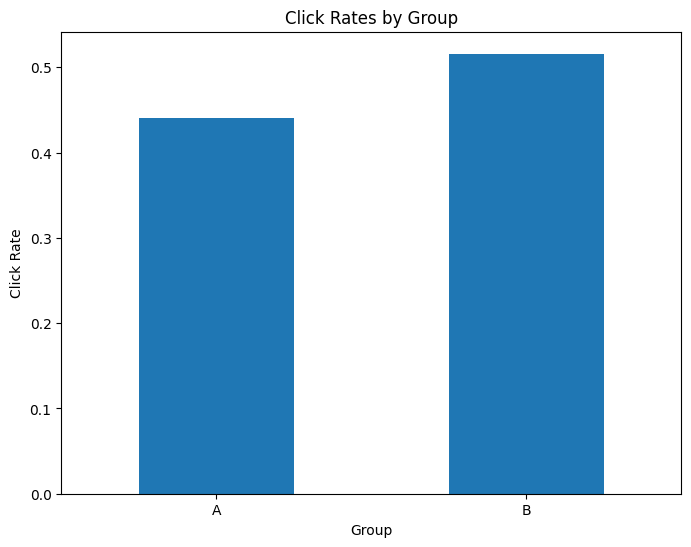

In [3]:
# Calculate click rates
click_rates = data.groupby('Group')['Click'].mean()

# Plot
click_rates.plot(kind='bar', figsize=(8, 6))
plt.title('Click Rates by Group')
plt.xlabel('Group')
plt.ylabel('Click Rate')
plt.xticks(rotation=0)
plt.show()


**Null Hypothesis:** There is no difference in click rates between groups.

**Alternative Hypothesis:** There is a difference in click rates between groups.


In [4]:
# Split the data into groups
a_clicks = data[data['Group'] == 'A']['Click']
b_clicks = data[data['Group'] == 'B']['Click']

# Perform two-sample t-test
t_stat, p_val = ttest_ind(a_clicks, b_clicks)

# Print results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: Significant difference in click rates.")
else:
    print("Fail to reject the null hypothesis: No significant difference in click rates.")


T-statistic: -3.3650
P-value: 0.0008
Reject the null hypothesis: Significant difference in click rates.


In [5]:
# Create a contingency table
contingency_table = pd.crosstab(data['Group'], data['Click'])

# Perform chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-value: {p_val:.4f}")

# Interpretation
if p_val < alpha:
    print("Reject the null hypothesis: Significant association between group and clicks.")
else:
    print("Fail to reject the null hypothesis: No significant association.")


Chi2 Statistic: 10.9723
P-value: 0.0009
Reject the null hypothesis: Significant association between group and clicks.


In [6]:
if p_val < alpha:
    print("The test results are significant. Group B performs better.")
else:
    print("The test results are not significant. No difference detected.")


The test results are significant. Group B performs better.
